In [32]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [33]:
# Store data, labels in the list
cur_path = "traffic_dataset"
data = []
labels = []
num_classes = len(os.listdir(cur_path + "\Train"))
print(num_classes)

43


In [34]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [35]:
# Retrieving the images and their labels 
for i in range(num_classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
# Preprocess the images
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            

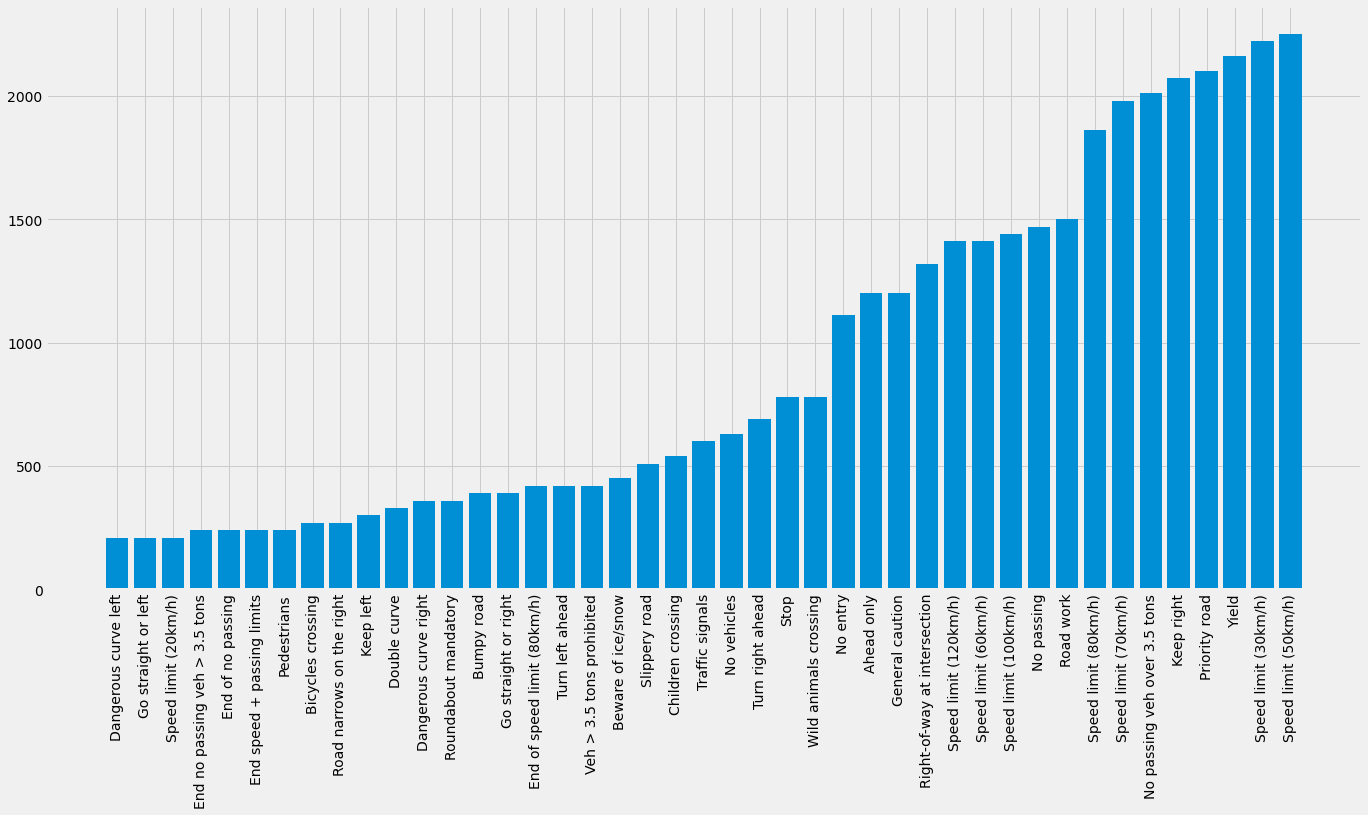

In [36]:
folders = os.listdir(cur_path + "\Train")

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(cur_path + "\Train" + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [37]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [38]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [39]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [40]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [41]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

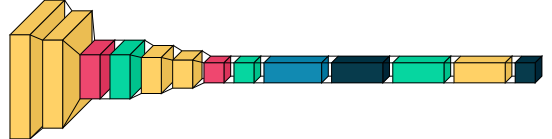

In [42]:
import visualkeras
visualkeras.layered_view(model)

In [43]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 36s 35ms/step - loss: 0.5300 - accuracy: 0.8622 - val_loss: 0.0765 - val_accuracy: 0.9793
Epoch 2/15
981/981 [==============================] - 34s 35ms/step - loss: 0.0734 - accuracy: 0.9793 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 3/15
981/981 [==============================] - 35s 36ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0656 - val_accuracy: 0.9821
Epoch 4/15
981/981 [==============================] - 35s 36ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0692 - val_accuracy: 0.9830
Epoch 5/15
981/981 [==============================] - 36s 37ms/step - loss: 0.0342 - accuracy: 0.9897 - val_loss: 0.0568 - val_accuracy: 0.9852
Epoch 6/15
981/981 [==============================] - 36s 36ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9887
Epoch 7/15
981/981 [==============================] - 35s 36ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy:

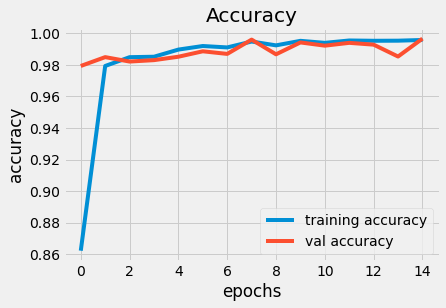

In [45]:
# Plotting graphs for Accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

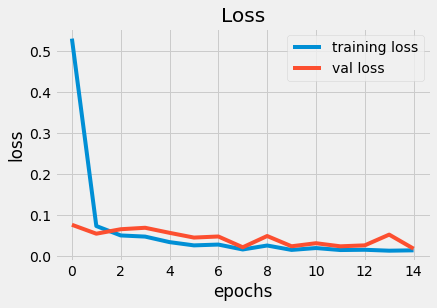

In [46]:
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("traffic_dataset\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [48]:
for img in imgs:
    image = Image.open(cur_path + '\\'+ img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [49]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9790182106096595


In [50]:
model.save('traffic_classifier.h5')